In [98]:
import numpy as np
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [99]:
boston = np.loadtxt("0000000000002419_training_ccpp_x_y_train.csv", delimiter=",", skiprows=1)
X = boston[:, :-1]
y = boston[:, -1]

sq = X ** 2
X = np.append(X, sq, axis=1)

interaction_terms = []
for i, j in itertools.combinations(range(X.shape[1]), 2):
    interaction = (X[:, i] * X[:, j]).reshape(-1, 1)
    interaction_terms.append(interaction)

interaction_terms = np.hstack(interaction_terms)
X = np.append(X, interaction_terms, axis=1)

In [100]:
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [102]:
def step(x, y, m, c, learning_rate):
    m_grad = np.zeros(len(m))  # Initialize slope gradients for all features
    c_grad = 0                 # Initialize intercept gradient

    for i in range(len(x)):
        y_pred_i = np.dot(x[i], m) + c       # Prediction for x[i]
        error = y[i] - y_pred_i              # Error for that prediction

        # Accumulate gradients
        m_grad += (-2 / len(x)) * error * x[i]  # Vector update for slopes
        c_grad += (-2 / len(x)) * error         # Scalar update for intercept

        # Update parameters
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad

    return m, c


# --- Batch Gradient Descent Runner ---
def gradient_descent(x, y, learning_rate, iterations):
    m = np.zeros(x.shape[1])  # Initialize weights (one per feature)
    c = 0                     # Initialize bias

    for i in range(iterations):
        m, c = step(x, y, m, c, learning_rate)
        print(f"Iteration {i+1}, Cost: {cost(x, y, m, c)}")  # Track loss

    return m, c


# --- Mean Squared Error (Cost Function) ---
def cost(x, y, m, c):
    return np.mean((y - (np.dot(x, m) + c)) ** 2)


# --- Prediction Function ---
def predict(x, m, c):
    return np.dot(x, m) + c


# --- R² Score (Performance Metric) ---
def score(y_truth, y_pred):
    u = ((y_truth - y_pred) ** 2).sum()  # Residual sum of squares
    v = ((y_truth - y_truth.mean()) ** 2).sum()  # Total sum of squares
    return 1 - u / v  # R² = 1 - (residual / total)


In [103]:
m, c = gradient_descent(X_train, y_train, learning_rate=0.0001, iterations=1000)
score_train = score(y_train, predict(X_train, m, c))
score_test = score(y_test, predict(X_test, m, c))
print(f"Training R² Score: {score_train}")
print(f"Testing R² Score: {score_test}")

Iteration 1, Cost: 47528.443387337014
Iteration 2, Cost: 11009.820624396054
Iteration 3, Cost: 2569.168445540748
Iteration 4, Cost: 616.6284424789173
Iteration 5, Cost: 165.7793609674932
Iteration 6, Cost: 61.3981023702734
Iteration 7, Cost: 36.96871714748202
Iteration 8, Cost: 30.833597316556183
Iteration 9, Cost: 29.068544002542023
Iteration 10, Cost: 28.34568416957985
Iteration 11, Cost: 27.880851347528843
Iteration 12, Cost: 27.612430832354168
Iteration 13, Cost: 27.265258298510552
Iteration 14, Cost: 27.126288865220165
Iteration 15, Cost: 26.804538456800646
Iteration 16, Cost: 26.742638749140568
Iteration 17, Cost: 26.429676264143637
Iteration 18, Cost: 26.423050711299446
Iteration 19, Cost: 26.11337631089316
Iteration 20, Cost: 26.149391600642264
Iteration 21, Cost: 25.8406321961235
Iteration 22, Cost: 25.910821763916402
Iteration 23, Cost: 25.60173003286996
Iteration 24, Cost: 25.699882853199817
Iteration 25, Cost: 25.389717215351563
Iteration 26, Cost: 25.51102312261209
Iterati

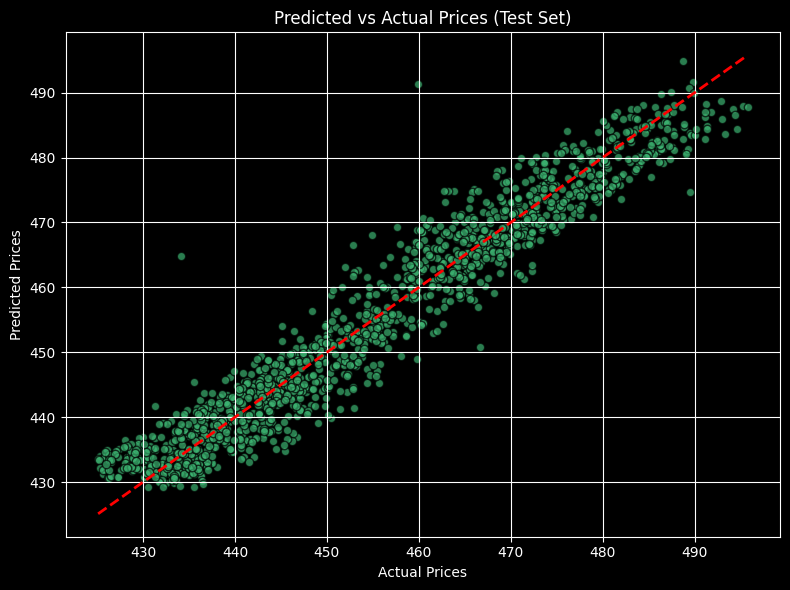

In [104]:
# Make predictions on the test set
y_pred_test = predict(X_test, m, c)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='mediumseagreen', alpha=0.7, edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [105]:
X = np.loadtxt("0000000000002419_test_ccpp_x_test.csv", delimiter=",")

sq = X ** 2
X = np.append(X, sq, axis=1)

interaction_terms = []
for i, j in itertools.combinations(range(X.shape[1]), 2):
    interaction = (X[:, i] * X[:, j]).reshape(-1, 1)
    interaction_terms.append(interaction)

interaction_terms = np.hstack(interaction_terms)
X = np.append(X, interaction_terms, axis=1)

In [106]:
X_scaled = scale.transform(X)

predictions = predict(X_scaled, m, c)

np.savetxt("predictions.csv", predictions, delimiter=",", comments='', fmt='%.5f')